
# Trabajo Práctico 2 V.2 - Marcelo Chichiri


Descargar el dataset **Facebook comment volume** https://archive.ics.uci.edu/ml/datasets/Facebook+Comment+Volume+Dataset. 

El dataset tiene diferentes versiones, utilizaremos la **número 5** para train y para test **Features_TestSet**. 

Notar que trae **carpeta de train y de test**. 

Una descripcióm completa del dataset pueden encontrarla en el link. Se trata de publicaciones de Facebook y se quiere **predecir la columna 54: cantidad de comentarios en las próximas H horas"**.

El dataset contiene variables en muchos formatos diferentes, algunos de los cuales no hemos trabajado o no lo hemos hechos en profundidad. Esas variables pueden ser descartadas o bien hacer una investigación personal para ver de qué manera poder incluirlas para mejorar los resultados obtenidos.


# Importar librerías

Importar aquellas librerías que serán utilizadas en el trabajo.

In [1]:
from sklearn import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

import matplotlib
import seaborn as sns
from pandas.plotting import scatter_matrix

from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import max_error

from sklearn.linear_model import Lasso 
from sklearn.linear_model import Ridge


# Cargar datos
Cargar los datos de entrenamiento.

In [2]:
PATH_DATASET_Training = "C:/EspecializaciónEnInteligenciaArtificial/INTRODUCCION A LA INTELIGENCIA ARTIFICIAL/TPs/Datos_TP2/Training"
PATH_DATASET_Testing = "C:/EspecializaciónEnInteligenciaArtificial/INTRODUCCION A LA INTELIGENCIA ARTIFICIAL/TPs/Datos_TP2/Testing/TestSet"

train = pd.read_csv(os.path.join(PATH_DATASET_Training, "Features_Variant_5.csv"), header=None)
test = pd.read_csv(os.path.join(PATH_DATASET_Testing, "Test_Case_5.csv"), header=None)


# Análisis exploratorio básico y preprocesamiento de los datos

Análisis de los datos para conocer los mismos, ver datos faltantes, decidir cómo tratarlos, ver distribuciones, relaciones, etc. Procesar los datos centrándolos, reescalando, codificando, reduciendo dimensiones, etc. según considere necesario. 

<AxesSubplot:>

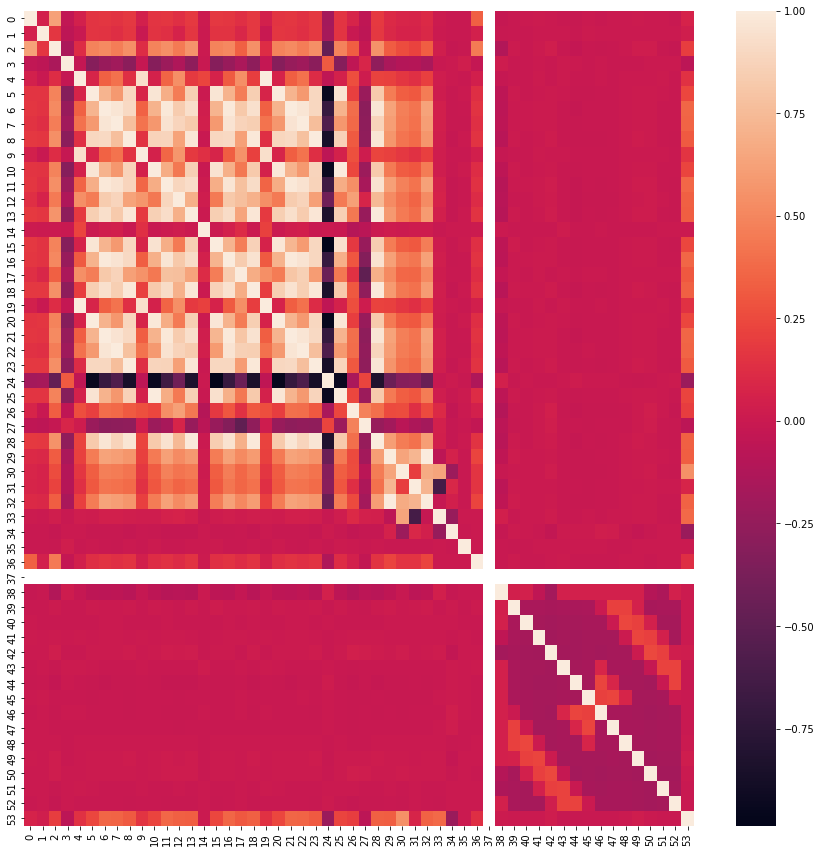

In [3]:
# Muestro graficamente la correlacion entre datos de train

corr_train = train.corr()
plt.subplots(figsize=(15,15))
sns.heatmap(corr_train)

In [4]:
# Se verifica si hay valores nulos en el dataset de training
if train.isnull().sum().sum() == 0:
    print('** El Dataset training no tiene nulos')
else:
    print('Hay %i nulos en el Dataset de training' % pdf_train.isnull().sum().sum())
    
# Se verifica si hay valores nulos en el dataset de test
if test.isnull().sum().sum() == 0:
    print('** El Dataset de test no tiene nulos')
else:
    print('Hay %i nulos en el Dataset de test' % pdf_train.isnull().sum().sum())

** El Dataset training no tiene nulos
** El Dataset de test no tiene nulos


In [5]:
# Se verifica si en training hay columnas con un solo valor. 
# Los features con un unico valor no aportan información adicional.
x = np.where(train.max(axis=0)==train.min(axis=0))

if np.any(x):
    print('columna con unico valor', x[0])
    print(train.iloc[:, x[0]])
else:
    print('No hay columnas con unico valor')

columna con unico valor [37]
        37
0        0
1        0
2        0
3        0
4        0
...     ..
199025   0
199026   0
199027   0
199028   0
199029   0

[199030 rows x 1 columns]


In [6]:
# Se verifica si en training hay fila con un solo valor
x = np.where(train.max(axis=1)==train.min(axis=1))

if np.any(x):
    print('Fila con unico valor', x[0])
    print(train.iloc[:, x[0]])
else:
    print('No hay filas con unico valor')

No hay filas con unico valor


In [7]:
#Se elimina la columna 37 que tiene valores cero para todos los datos 
print('Shape training antes de limpieza : ', np.shape(train))
train = train.drop(train.columns[[37]], axis=1) 
print('Shape training despues de limpieza : ', np.shape(train))

Shape training antes de limpieza :  (199030, 54)
Shape training despues de limpieza :  (199030, 53)


In [8]:
# Se elimina la columna tambien de test
print('Shape test antes de limpieza : ', np.shape(test))
test = test.drop(test.columns[[37]], axis=1)
print('Shape tes despues de limpieza : ', np.shape(test))

Shape test antes de limpieza :  (100, 54)
Shape tes despues de limpieza :  (100, 53)


In [9]:
# Vuelvo a verificar si hay columnas y filas con un solo valor
x = np.where(train.max(axis=0)==train.min(axis=0))

if np.any(x):
    print('columna con unico valor', x[0])
    print(train.iloc[:, x[0]])
else:
    print('No hay columnas con unico valor')

x = np.where(train.max(axis=1)==train.min(axis=1))

if np.any(x):
    print('Fila con unico valor', x[0])
    print(train.iloc[:, x[0]])
else:
    print('No hay filas con unico valor')

No hay columnas con unico valor
No hay filas con unico valor


In [10]:
# Renombro las columnas de training y test porque quité la 37

for i in range(np.shape(train)[1]-1):
    train.columns.values[i] = str(i)

for i in range(np.shape(test)[1]-1):
    test.columns.values[i] = str(i)

In [11]:
# Para verificar la numeracion de cada dataset

print('Train :', train.columns)
print('Test :', test.columns)

Train : Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 53],
           dtype='int64')
Test : Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 53],
           dtype='int64')


In [12]:
# Separo los datasets de train y test en features x y salida y
# La salida y es la ultima columna 

shape_train = np.shape(train)

# separo x de y en dataset de training. 'y' es la última columna del dataset
x_train = train.iloc[:, 0:np.shape(train)[1]-1]
y_train = train.iloc[:, np.shape(train)[1]-1]

# separo x de y en dataset de test 
x_test = test.iloc[:, 0:np.shape(test)[1]-1]
y_test = test.iloc[:, np.shape(test)[1]-1]

# Imprimo el shape de cada dataset 
print('x training', np.shape(x_train))
print('y training', np.shape(y_train))

print('x test', np.shape(x_test))
print('y test', np.shape(y_test))

x training (199030, 52)
y training (199030,)
x test (100, 52)
y test (100,)


In [13]:
# Informacion del dataset de train
x_train.info

<bound method DataFrame.info of              0   1       2   3    4       5           6      7           8   \
0        634995   0     463   1  0.0  1280.0   13.158779    1.0   94.993640   
1        634995   0     463   1  0.0  1280.0   13.158779    1.0   94.993640   
2        634995   0     463   1  0.0  1280.0   13.158779    1.0   94.993640   
3        634995   0     463   1  0.0  1280.0   13.158779    1.0   94.993640   
4        634995   0     463   1  0.0  1280.0   13.158779    1.0   94.993640   
...         ...  ..     ...  ..  ...     ...         ...    ...         ...   
199025  7170111  70  497000   9  0.0  2164.0  466.975207  244.0  497.966169   
199026  7170111  70  497000   9  0.0  2164.0  466.975207  244.0  497.966169   
199027  7170111  70  497000   9  0.0  2164.0  466.975207  244.0  497.966169   
199028  7170111  70  497000   9  0.0  2164.0  466.975207  244.0  497.966169   
199029  7170111  70  497000   9  0.0  2164.0  466.975207  244.0  497.966169   

         9   ...  4

In [14]:
# Describo los features del dataset de training  
x_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
count,1.990300e+05,199030.000000,1.990300e+05,199030.000000,199030.000000,199030.000000,199030.000000,199030.000000,199030.000000,199030.000000,...,199030.000000,199030.000000,199030.000000,199030.000000,199030.000000,199030.000000,199030.000000,199030.000000,199030.000000,199030.00000
mean,1.313785e+06,4674.517731,4.477173e+04,24.242074,0.470256,485.317656,55.901120,35.263538,68.090731,0.068135,...,0.144184,0.146209,0.136954,0.139391,0.134829,0.136788,0.147088,0.155298,0.144245,0.14236
std,6.771131e+06,20573.440641,1.108983e+05,19.935334,13.178067,538.194418,86.515496,68.162671,82.411057,2.172591,...,0.351277,0.353317,0.343800,0.346355,0.341542,0.343625,0.354195,0.362190,0.351338,0.34942
min,3.600000e+01,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.673400e+04,0.000000,6.980000e+02,9.000000,0.000000,49.000000,5.494737,2.000000,8.033255,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,2.929110e+05,0.000000,7.237000e+03,18.000000,0.000000,256.000000,23.647407,12.000000,35.022296,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,1.204214e+06,99.000000,5.026400e+04,32.000000,0.000000,784.000000,70.931961,41.000000,104.152684,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,4.869723e+08,186370.000000,6.089942e+06,106.000000,1458.000000,2495.000000,2031.000000,2123.000000,762.357746,227.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [15]:
# Describo la salida del dataset de training 
y_train.describe()

count    199030.000000
mean          7.168708
std          34.298193
min           0.000000
25%           0.000000
50%           0.000000
75%           3.000000
max        1702.000000
Name: 53, dtype: float64

<AxesSubplot:>

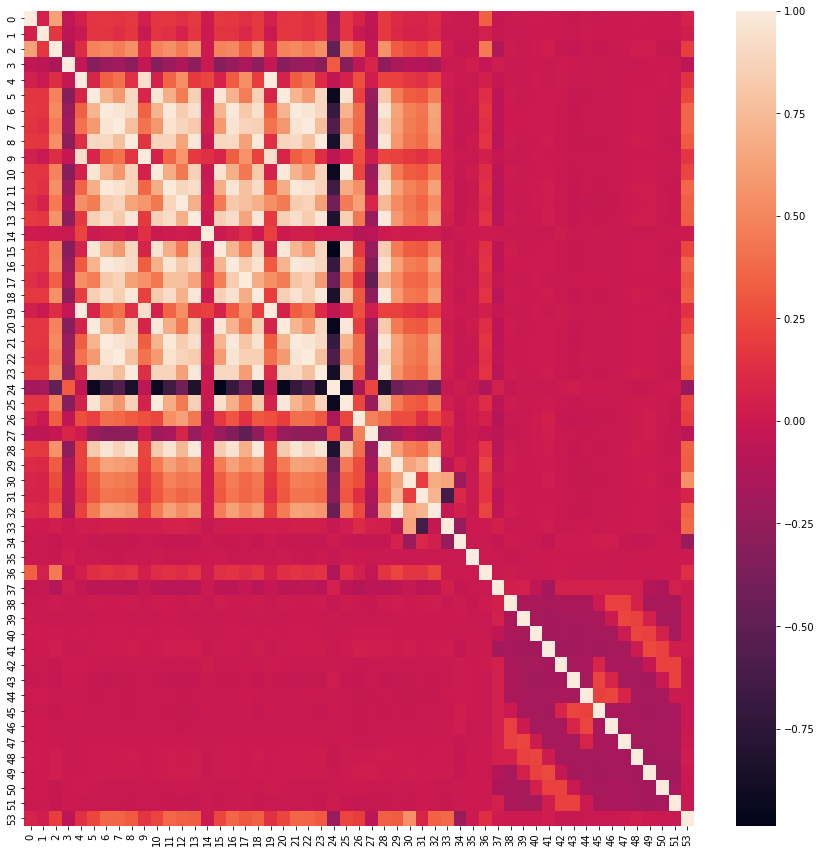

In [16]:
# Muestro graficamente la correlacion entre datos de train

corr_train = train.corr()
plt.subplots(figsize=(15,15))
sns.heatmap(corr_train)

In [17]:
# Exploro la correlacion de la salida respecto a los otras features
print(np.shape(corr_train))
print(corr_train.iloc[np.shape(corr_train)[1]-1])

(53, 53)
0     0.064537
1     0.035152
2     0.194768
3    -0.069001
4     0.138996
5     0.238743
6     0.359536
7     0.349452
8     0.316593
9     0.153853
10    0.229139
11    0.368003
12    0.339229
13    0.329067
14    0.004411
15    0.234408
16    0.356985
17    0.303185
18    0.333375
19    0.139476
20    0.232497
21    0.356769
22    0.348033
23    0.309988
24   -0.221228
25    0.230101
26    0.192558
27   -0.065052
28    0.339319
29    0.327086
30    0.545260
31    0.073260
32    0.342653
33    0.375318
34   -0.224366
35   -0.001237
36    0.124638
37    0.012255
38    0.000587
39   -0.000575
40    0.004769
41    0.022337
42   -0.009496
43   -0.010470
44   -0.008114
45   -0.008700
46   -0.003049
47    0.004611
48    0.023267
49   -0.000927
50   -0.007210
51   -0.008304
53    1.000000
Name: 53, dtype: float64


In [18]:
# Guardo un backup de los datos para seguir depurando 
x_trainBk = x_train
y_trainBk = y_train

# separo x de y en dataset de test 
x_testBk = x_test
y_testBk = y_test

In [19]:
# Hago correlacion para analizar relaciones entre features
corr1 = x_trainBk.corr()
correlacion_maxima = (corr1[corr1[(corr1.iloc[:,:] < 1)] > 0.9])


suma_correlacion_maxima = np.shape(correlacion_maxima)[0] - correlacion_maxima.isna().sum()
print('Features con mayor correlacion :\n', suma_correlacion_maxima[::1])

for i in range(0,53,7):
    print(correlacion_maxima.iloc[:,i:i+7])

print('Shape matriz correlacion maxima : ', np.shape(suma_correlacion_maxima))
print('Valores de correlacion maxima sumados : ', suma_correlacion_maxima[::-1])

Features con mayor correlacion :
 0      0
1      0
2      0
3      0
4      2
5      4
6      9
7      5
8      6
9      2
10     4
11     8
12     0
13     8
14     0
15     4
16     8
17     0
18     8
19     2
20     4
21    10
22     5
23     5
24     0
25     4
26     0
27     0
28     8
29     1
30     0
31     0
32     1
33     0
34     0
35     0
36     0
37     0
38     0
39     0
40     0
41     0
42     0
43     0
44     0
45     0
46     0
47     0
48     0
49     0
50     0
51     0
dtype: int64
     0   1   2   3         4         5         6
0  NaN NaN NaN NaN       NaN       NaN       NaN
1  NaN NaN NaN NaN       NaN       NaN       NaN
2  NaN NaN NaN NaN       NaN       NaN       NaN
3  NaN NaN NaN NaN       NaN       NaN       NaN
4  NaN NaN NaN NaN       NaN       NaN       NaN
5  NaN NaN NaN NaN       NaN       NaN       NaN
6  NaN NaN NaN NaN       NaN       NaN       NaN
7  NaN NaN NaN NaN       NaN       NaN  0.963216
8  NaN NaN NaN NaN       NaN       NaN  0.90

In [20]:
#Se eliminan las columnas con valores de correlacion mayores a 0.9 en train

# La columna 21 esta altamente relacionada con las siguientes, por lo cual se eliminan esa columnas y se deja la 21 
Columnas_eliminar = [28, 23, 22, 18, 16, 13, 11, 8, 7, 6]
print('Shape training antes de limpieza : ', np.shape(x_trainBk))
x_trainBk1 = x_trainBk.drop(x_trainBk.columns[Columnas_eliminar], axis=1) 
print('Shape training despues de limpieza : ', np.shape(x_trainBk1))

#Se elimina las mismas columna en test
print('Shape training antes de limpieza : ', np.shape(x_testBk))
x_testBk1 = x_testBk.drop(x_testBk.columns[Columnas_eliminar], axis=1) 
print('Shape training despues de limpieza : ', np.shape(x_testBk1))


Shape training antes de limpieza :  (199030, 52)
Shape training despues de limpieza :  (199030, 42)
Shape training antes de limpieza :  (100, 52)
Shape training despues de limpieza :  (100, 42)


In [21]:
# Renombro las columnas de training y test porque quité algunas

for i in range(np.shape(x_trainBk1)[1]):
    x_trainBk1.columns.values[i] = str(i)

for i in range(np.shape(x_testBk1)[1]):
    x_testBk1.columns.values[i] = str(i)

In [22]:
# Vuelvo a correlacionar para analizar relaciones entre features
corr1 = x_trainBk1.corr()
correlacion_maxima = (corr1[corr1[(corr1.iloc[:,:] < 1)] > 0.9])

suma_correlacion_maxima = np.shape(correlacion_maxima)[0] - correlacion_maxima.isna().sum()
print('Features con mayor correlacion :\n', suma_correlacion_maxima[::1])
#print('Correlación entre campos: \n', suma_correlacion_maxima[::-1])

for i in range(0,53,7):
    print(correlacion_maxima.iloc[:,i:i+7])

print('Shape matriz correlacion maxima : ', np.shape(suma_correlacion_maxima))
print('Valores de correlacion maxima sumados : ', suma_correlacion_maxima[::-1])

Features con mayor correlacion :
 0     0
1     0
2     0
3     0
4     2
5     4
6     2
7     4
8     0
9     0
10    4
11    0
12    2
13    4
14    0
15    0
16    4
17    0
18    0
19    1
20    0
21    0
22    1
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
dtype: int64
     0   1   2   3         4         5         6
0  NaN NaN NaN NaN       NaN       NaN       NaN
1  NaN NaN NaN NaN       NaN       NaN       NaN
2  NaN NaN NaN NaN       NaN       NaN       NaN
3  NaN NaN NaN NaN       NaN       NaN       NaN
4  NaN NaN NaN NaN       NaN       NaN  0.930690
5  NaN NaN NaN NaN       NaN       NaN       NaN
6  NaN NaN NaN NaN  0.930690       NaN       NaN
7  NaN NaN NaN NaN       NaN  0.968435       NaN
8  NaN NaN NaN NaN       NaN       NaN       NaN
9  NaN NaN NaN NaN       NaN       NaN       NaN
10 NaN NaN NaN NaN       NaN  0.967804       NaN
11 NaN NaN NaN NaN       NaN 

<AxesSubplot:>

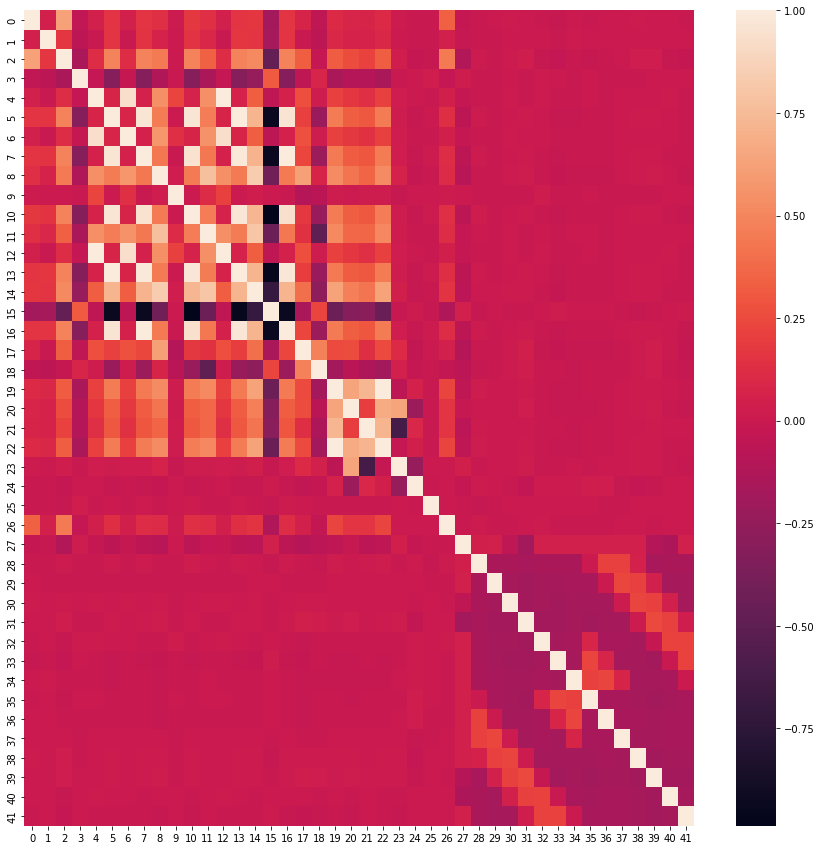

In [23]:
# Muestro graficamente la correlacion entre datos de train ahora con los features reducidos

corr_trainBk1 = x_trainBk1.corr()
plt.subplots(figsize=(15,15))
sns.heatmap(corr_trainBk1)

# Modelos y evaluación
Probar diferentes modelos para predecir la variable objetivo. Calcular las métricas que considere relevantes. Comentar los resultados. 

In [24]:
# Se crea un Dataframe para guardar los resultados de cada modelo y poder presentarlos al final 
data = []
dfs = pd.DataFrame(data,columns=['Modelo', 'ECM Test','Max error Test', 'score Test', 'ECM Train', 'Max error Train', 'score Train'])

#### Se corren modelos lineales con algunas variantes para poder comparar los resultados.
#### Los resultados de cada modelo se compararán con graficos de barras ya que una matriz de confusión resultaba poco clara por la cantidad de datos 

Error cuadrado medio test: 1860.39
Maximo error test: 246.17
Error cuadrado medio train: 772.66
Maximo error train: 1525.45
Score con training :  0.34317769452907276
Score con test :  0.5145526936365953


C:\Users\Marcelo\AppData\Local\Temp\ipykernel_4920\1104579610.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfs = dfs.append({'Modelo': 'Basico','ECM Test': mse_test, 'Max error Test':max_err_test, 'score Test': test_score, 'ECM Train': mse_train,'Max error Train': max_err_train, 'score Train': train_score}, ignore_index=True)


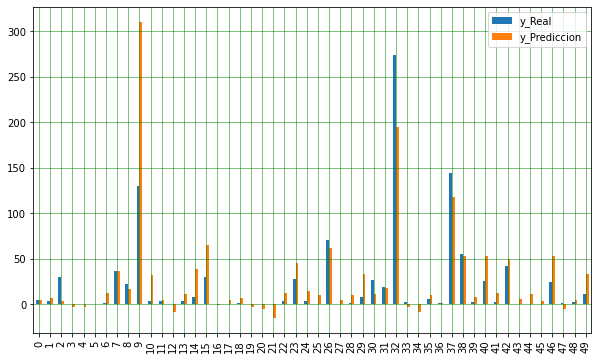

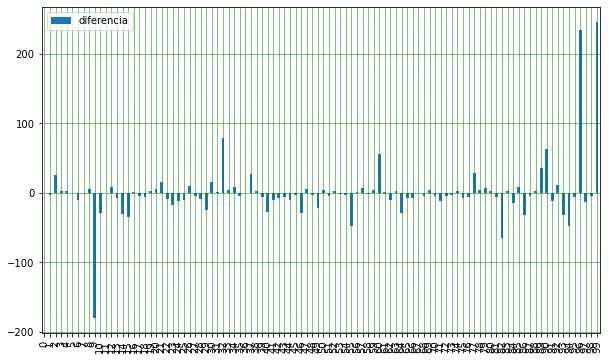

In [25]:
# Modelo basico
modelo1 = make_pipeline(LinearRegression())
modelo1.fit(x_train, y_train)
y_pred_modelo1 = modelo1.predict(x_test)

mse_test = mean_squared_error(y_pred_modelo1, y_test)
max_err_test = max_error(y_pred_modelo1, y_test)
print("Error cuadrado medio test: %.2f" % mse_test)
print("Maximo error test: %.2f" % max_err_test)

y_pred_train_modelo1 = modelo1.predict(x_train)
mse_train = mean_squared_error(y_train, y_pred_train_modelo1)
max_err_train = max_error(y_train, y_pred_train_modelo1)

print("Error cuadrado medio train: %.2f" % mse_train)
print("Maximo error train: %.2f" % max_err_train)

train_score = modelo1.score(x_train, y_train)
print("Score con training : ", train_score)

test_score = modelo1.score(x_test, y_test)
print("Score con test : ", test_score)

dfs = dfs.append({'Modelo': 'Basico','ECM Test': mse_test, 'Max error Test':max_err_test, 'score Test': test_score, 'ECM Train': mse_train,'Max error Train': max_err_train, 'score Train': train_score}, ignore_index=True)

data = {'y_Real':    y_test[0:100],
        'y_Prediccion': y_pred_modelo1[0:100],
        }

df = pd.DataFrame(data, columns=['y_Real','y_Prediccion'])

#Presenta los primeros n datos del dataset de test para compararlo con la estimacion
n = 50
df1 = df.head(n)
df1.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

data = {'diferencia' : y_test[0:100] - y_pred_modelo1[0:100]
        }

df = pd.DataFrame(data, columns=['diferencia'])

df1 = df.head(len(y_test))
df1.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Error cuadrado medio test: 1862.03
Maximo error test: 246.17
Error cuadrado medio train: 772.66
Maximo error train: 1525.45
Score con training :  0.3431777011609525
Score con test :  0.5141264043122168


C:\Users\Marcelo\AppData\Local\Temp\ipykernel_4920\1526397409.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfs = dfs.append({'Modelo': 'Con escalado','ECM Test': mse_test, 'Max error Test':max_err_test, 'score Test': test_score, 'ECM Train': mse_train,'Max error Train': max_err_train, 'score Train': train_score}, ignore_index=True)


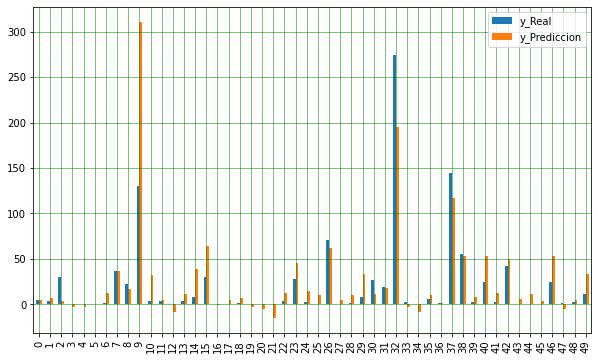

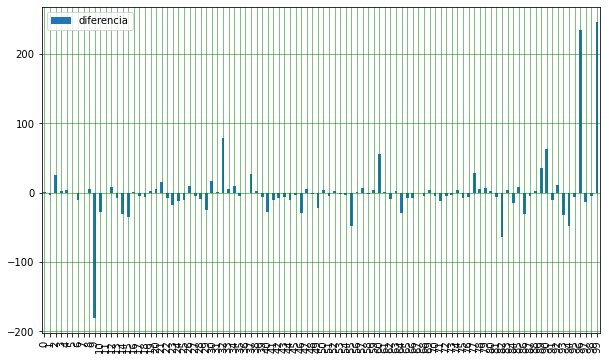

In [26]:
# Modelo con Escalado
modelo2 = make_pipeline(StandardScaler(with_mean=True), LinearRegression())
modelo2.fit(x_train, y_train)
y_pred_modelo2 = modelo2.predict(x_test)

mse_test = mean_squared_error(y_pred_modelo2, y_test)
max_err_test = max_error(y_pred_modelo2, y_test)
print("Error cuadrado medio test: %.2f" % mse_test)
print("Maximo error test: %.2f" % max_err_test)

y_pred_train_modelo2 = modelo2.predict(x_train)
mse_train = mean_squared_error(y_train, y_pred_train_modelo2)
max_err_train = max_error(y_train, y_pred_train_modelo2)

print("Error cuadrado medio train: %.2f" % mse_train)
print("Maximo error train: %.2f" % max_err_train)

train_score = modelo2.score(x_train, y_train)
print("Score con training : ", train_score)

test_score = modelo2.score(x_test, y_test)
print("Score con test : ", test_score)

dfs = dfs.append({'Modelo': 'Con escalado','ECM Test': mse_test, 'Max error Test':max_err_test, 'score Test': test_score, 'ECM Train': mse_train,'Max error Train': max_err_train, 'score Train': train_score}, ignore_index=True)

data = {'y_Real':    y_test[0:100],
        'y_Prediccion': y_pred_modelo2[0:100]
        }

df = pd.DataFrame(data, columns=['y_Real','y_Prediccion'])

#Presenta los primeros n datos del dataset de test para compararlo con la estimacion
n = 50
df1 = df.head(n)
df1.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

data = {'diferencia' : y_test[0:100] - y_pred_modelo2[0:100]
        }

df = pd.DataFrame(data, columns=['diferencia'])

df1 = df.head(len(y_test))
df1.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Error cuadrado medio test: 1856.40
Maximo error test: 246.21
Error cuadrado medio train: 772.66
Maximo error train: 1525.45
Score con training :  0.34317759017332494


C:\Users\Marcelo\AppData\Local\Temp\ipykernel_4920\2986654775.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfs = dfs.append({'Modelo': 'Con escalado sin media','ECM Test': mse_test, 'Max error Test':max_err_test, 'score Test': test_score, 'ECM Train': mse_train,'Max error Train': max_err_train, 'score Train': train_score}, ignore_index=True)


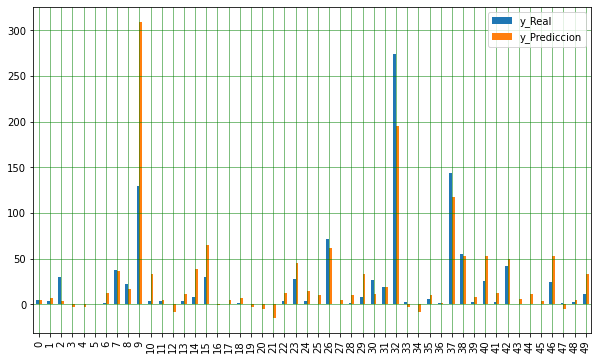

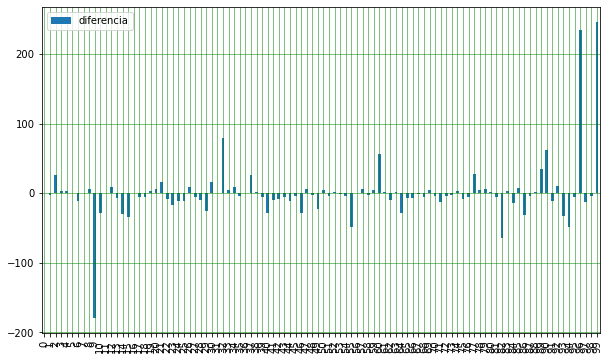

In [27]:
# Escalado sin media
modelo3 = make_pipeline(StandardScaler(with_mean=False), LinearRegression())
modelo3.fit(x_train, y_train)
y_pred_modelo3 = modelo3.predict(x_test)

mse_test = mean_squared_error(y_pred_modelo3, y_test)
max_err_test = max_error(y_pred_modelo3, y_test)
print("Error cuadrado medio test: %.2f" % mse_test)
print("Maximo error test: %.2f" % max_err_test)

y_pred_train_modelo3 = modelo3.predict(x_train)
mse_train = mean_squared_error(y_train, y_pred_train_modelo3)
max_err_train = max_error(y_train, y_pred_train_modelo3)

print("Error cuadrado medio train: %.2f" % mse_train)
print("Maximo error train: %.2f" % max_err_train)

train_score = modelo3.score(x_train, y_train)
print("Score con training : ", train_score)

dfs = dfs.append({'Modelo': 'Con escalado sin media','ECM Test': mse_test, 'Max error Test':max_err_test, 'score Test': test_score, 'ECM Train': mse_train,'Max error Train': max_err_train, 'score Train': train_score}, ignore_index=True)

data = {'y_Real':    y_test[0:100],
        'y_Prediccion': y_pred_modelo3[0:100]
        }

df = pd.DataFrame(data, columns=['y_Real','y_Prediccion'])

#Presenta los primeros n datos del dataset de test para compararlo con la estimacion
n = 50
df1 = df.head(n)
df1.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

data = {'diferencia' : y_test[0:100] - y_pred_modelo3[0:100]
        }

df = pd.DataFrame(data, columns=['diferencia'])

df1 = df.head(len(y_test))
df1.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Cantidad de features seleccionadas :  17
Correlacion entre la salida y los siguientes features : 
 6     0.359536
7     0.349452
8     0.316593
11    0.368003
12    0.339229
13    0.329067
16    0.356985
17    0.303185
18    0.333375
21    0.356769
22    0.348033
23    0.309988
28    0.339319
29    0.327086
30    0.545260
32    0.342653
33    0.375318
Name: 53, dtype: float64
Error cuadrado medio test: 1584.79
Maximo error test: 240.56
Error cuadrado medio train: 790.02
Maximo error train: 1535.09
Score con training :  0.32842389050644794
Score con test :  0.5864672988683248


C:\Users\Marcelo\AppData\Local\Temp\ipykernel_4920\2899768028.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfs = dfs.append({'Modelo': 'Reducido por correlacion de y','ECM Test': mse_test, 'Max error Test':max_err_test, 'score Test': test_score, 'ECM Train': mse_train,'Max error Train': max_err_train, 'score Train': train_score}, ignore_index=True)


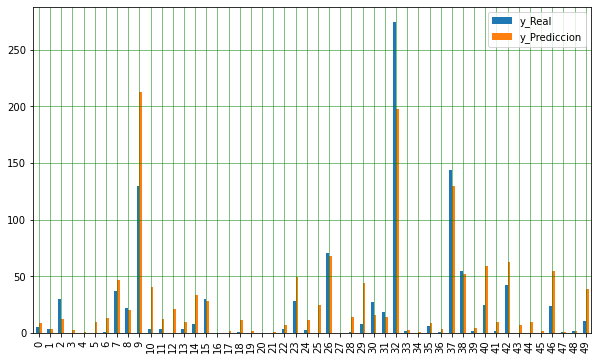

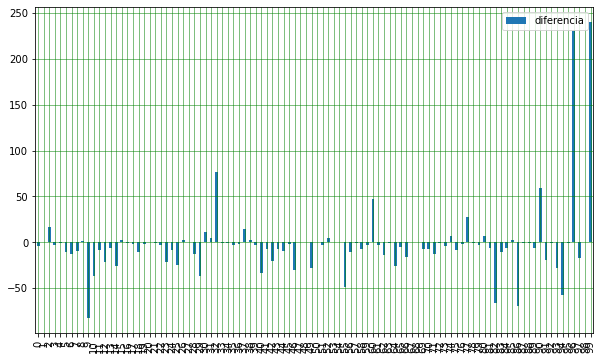

In [28]:
# Se reducen la cantidad de features del dataset considerando la correlación entre la salida y cada feature

# Calcula la correlacion de las feactures de train para obtener las que estén menos relacionadas con la salida 'y'
corr1 = train.corr()
corr1_mayor = corr1[corr1.iloc[:, 52]>0.3]

lista_mayores = corr1_mayor.iloc[0:np.shape(corr1_mayor)[0]-1, np.shape(corr1_mayor)[1]-1]
print('Cantidad de features seleccionadas : ', len(corr1_mayor)-1)
print('Correlacion entre la salida y los siguientes features : \n', lista_mayores)
indices = [index for index, valor in enumerate(corr1) if valor in lista_mayores]

x_reduc = x_train[indices]
x_test_reduc = x_test[indices]

modelo4 = make_pipeline(LinearRegression())
modelo4.fit(x_reduc, y_train)
y_pred_modelo4 = modelo4.predict(x_test_reduc)

mse_test = mean_squared_error(y_pred_modelo4, y_test)
max_err_test = max_error(y_pred_modelo4, y_test)
print("Error cuadrado medio test: %.2f" % mse_test)
print("Maximo error test: %.2f" % max_err_test)

y_pred_train_modelo4 = modelo4.predict(x_reduc)
mse_train = mean_squared_error(y_train, y_pred_train_modelo4)
max_err_train = max_error(y_train, y_pred_train_modelo4)
print("Error cuadrado medio train: %.2f" % mse_train)
print("Maximo error train: %.2f" % max_err_train)

dfs = dfs.append({'Modelo': 'Reducido por correlacion de y','ECM Test': mse_test, 'Max error Test':max_err_test, 'score Test': test_score, 'ECM Train': mse_train,'Max error Train': max_err_train, 'score Train': train_score}, ignore_index=True)

train_score = modelo4.score(x_reduc, y_train)
print("Score con training : ", train_score)

test_score = modelo4.score(x_test_reduc, y_test)
print("Score con test : ", test_score)

data = {'y_Real':    y_test[0:100],
        'y_Prediccion': y_pred_modelo4[0:100]
        }

df = pd.DataFrame(data, columns=['y_Real','y_Prediccion'])

#Presenta los primeros n datos del dataset de test para compararlo con la estimacion
n = 50
df1 = df.head(n)
df1.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

data = {'diferencia' : y_test[0:100] - y_pred_modelo4[0:100]
        }

df = pd.DataFrame(data, columns=['diferencia'])

df1 = df.head(len(y_test))
df1.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

### Se realizan utilizan los mismos modelos con el dataset reducido

Error cuadrado medio test: 2885.79
Maximo error test: 341.49
Error cuadrado medio train: 778.04
Maximo error train: 1579.81
Score con training :  0.3386012485798606
Score con test :  0.24698870762113379


C:\Users\Marcelo\AppData\Local\Temp\ipykernel_4920\499905782.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfs = dfs.append({'Modelo': 'Basico Reducido con reduccion de features ','ECM Test': mse_test, 'Max error Test':max_err_test, 'score Test': test_score, 'ECM Train': mse_train,'Max error Train': max_err_train, 'score Train': train_score}, ignore_index=True)


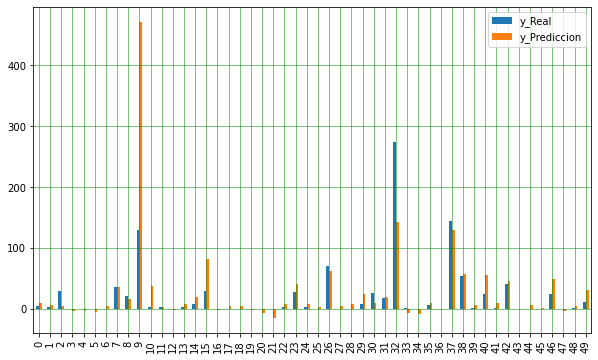

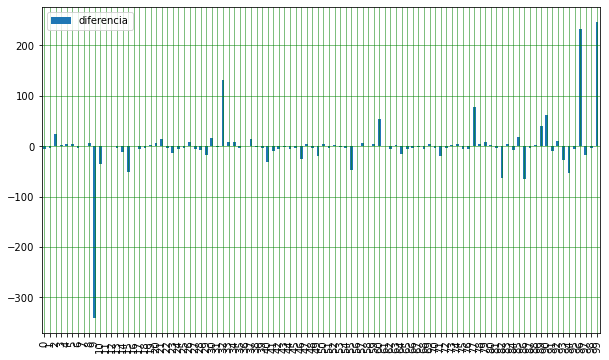

In [29]:
# Modelo basico con dataset reducido
modelo5 = make_pipeline(LinearRegression())
modelo5.fit(x_trainBk1, y_train)
y_pred_modelo5 = modelo5.predict(x_testBk1)

mse_test = mean_squared_error(y_pred_modelo5, y_test)
max_err_test = max_error(y_pred_modelo5, y_test)
print("Error cuadrado medio test: %.2f" % mse_test)
print("Maximo error test: %.2f" % max_err_test)

y_pred_train_modelo5 = modelo5.predict(x_trainBk1)
mse_train = mean_squared_error(y_train, y_pred_train_modelo5)
max_err_train = max_error(y_train, y_pred_train_modelo5)

print("Error cuadrado medio train: %.2f" % mse_train)
print("Maximo error train: %.2f" % max_err_train)

train_score = modelo5.score(x_trainBk1, y_train)
print("Score con training : ", train_score)

test_score = modelo5.score(x_testBk1, y_test)
print("Score con test : ", test_score)

dfs = dfs.append({'Modelo': 'Basico Reducido con reduccion de features ','ECM Test': mse_test, 'Max error Test':max_err_test, 'score Test': test_score, 'ECM Train': mse_train,'Max error Train': max_err_train, 'score Train': train_score}, ignore_index=True)

data = {'y_Real':    y_test[0:100],
        'y_Prediccion': y_pred_modelo5[0:100]
        }

df = pd.DataFrame(data, columns=['y_Real','y_Prediccion'])

df1 = df.head(50)
df1.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

data = {'diferencia' : y_test[0:100] - y_pred_modelo5[0:100]
        }

df = pd.DataFrame(data, columns=['diferencia'])

df1 = df.head(len(y_test))
df1.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Error cuadrado medio test: 2885.79
Maximo error test: 341.49
Error cuadrado medio train: 778.04
Maximo error train: 1579.81
Score con training :  0.3386012485798606
Score con test :  0.24698870762745073


C:\Users\Marcelo\AppData\Local\Temp\ipykernel_4920\3871087702.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfs = dfs.append({'Modelo': 'Con escalado reducido con reduccion de features','ECM Test': mse_test, 'Max error Test':max_err_test, 'score Test': test_score, 'ECM Train': mse_train,'Max error Train': max_err_train, 'score Train': train_score}, ignore_index=True)


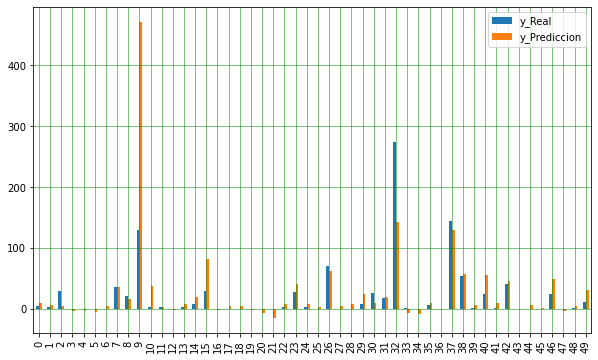

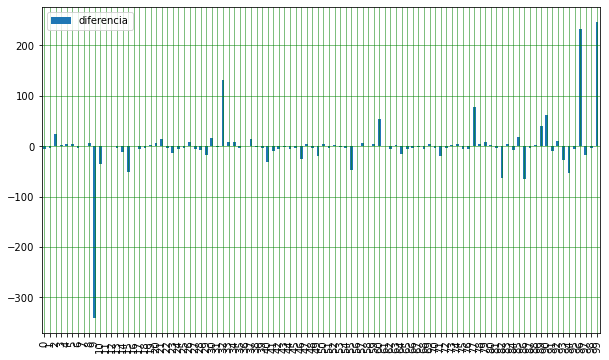

In [30]:
# Modelo con Escalado y dataset reducido
modelo6 = make_pipeline(StandardScaler(with_mean=True), LinearRegression())
modelo6.fit(x_trainBk1, y_train)
y_pred_modelo6 = modelo6.predict(x_testBk1)

mse_test = mean_squared_error(y_pred_modelo6, y_test)
max_err_test = max_error(y_pred_modelo6, y_test)
print("Error cuadrado medio test: %.2f" % mse_test)
print("Maximo error test: %.2f" % max_err_test)

y_pred_train_modelo6 = modelo6.predict(x_trainBk1)
mse_train = mean_squared_error(y_train, y_pred_train_modelo6)
max_err_train = max_error(y_train, y_pred_train_modelo6)

print("Error cuadrado medio train: %.2f" % mse_train)
print("Maximo error train: %.2f" % max_err_train)

train_score = modelo6.score(x_trainBk1, y_train)
print("Score con training : ", train_score)

test_score = modelo6.score(x_testBk1, y_test)
print("Score con test : ", test_score)

dfs = dfs.append({'Modelo': 'Con escalado reducido con reduccion de features','ECM Test': mse_test, 'Max error Test':max_err_test, 'score Test': test_score, 'ECM Train': mse_train,'Max error Train': max_err_train, 'score Train': train_score}, ignore_index=True)

data = {'y_Real':    y_test[0:100],
        'y_Prediccion': y_pred_modelo6[0:100]
        }

df = pd.DataFrame(data, columns=['y_Real','y_Prediccion'])

#Presenta los primeros n datos del dataset de test para compararlo con la estimacion
n = 50
df1 = df.head(n)
df1.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

data = {'diferencia' : y_test[0:100] - y_pred_modelo6[0:100]
        }

df = pd.DataFrame(data, columns=['diferencia'])

df1 = df.head(len(y_test))
df1.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Error cuadrado medio test: 2885.79
Maximo error test: 341.49
Error cuadrado medio train: 778.04
Maximo error train: 1579.81
Score con training :  0.3386012485798606


C:\Users\Marcelo\AppData\Local\Temp\ipykernel_4920\2120406268.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfs = dfs.append({'Modelo': 'Sin media reducido con reduccion de features','ECM Test': mse_test, 'Max error Test':max_err_test, 'score Test': test_score, 'ECM Train': mse_train,'Max error Train': max_err_train, 'score Train': train_score}, ignore_index=True)


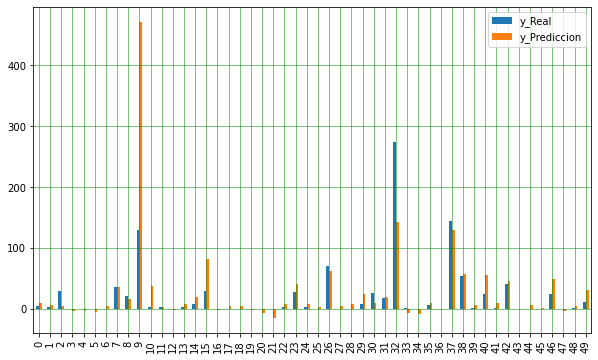

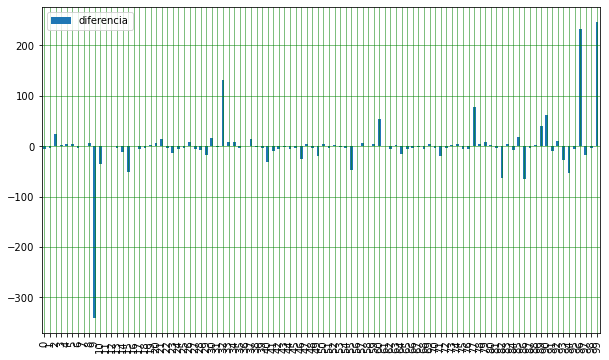

In [31]:
# Escalado sin media
modelo7 = make_pipeline(StandardScaler(with_mean=False), LinearRegression())
modelo7.fit(x_trainBk1, y_train)
y_pred_modelo7 = modelo7.predict(x_testBk1)

mse_test = mean_squared_error(y_pred_modelo7, y_test)
max_err_test = max_error(y_pred_modelo7, y_test)
print("Error cuadrado medio test: %.2f" % mse_test)
print("Maximo error test: %.2f" % max_err_test)

y_pred_train_modelo7 = modelo7.predict(x_trainBk1)
mse_train = mean_squared_error(y_train, y_pred_train_modelo7)
max_err_train = max_error(y_train, y_pred_train_modelo7)

print("Error cuadrado medio train: %.2f" % mse_train)
print("Maximo error train: %.2f" % max_err_train)

train_score = modelo7.score(x_trainBk1, y_train)
print("Score con training : ", train_score)

dfs = dfs.append({'Modelo': 'Sin media reducido con reduccion de features','ECM Test': mse_test, 'Max error Test':max_err_test, 'score Test': test_score, 'ECM Train': mse_train,'Max error Train': max_err_train, 'score Train': train_score}, ignore_index=True)

data = {'y_Real':    y_test[0:100],
        'y_Prediccion': y_pred_modelo7[0:100]
        }

df = pd.DataFrame(data, columns=['y_Real','y_Prediccion'])

#Presenta los primeros n datos del dataset de test para compararlo con la estimacion
n = 50
df1 = df.head(n)
df1.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

data = {'diferencia' : y_test[0:100] - y_pred_modelo7[0:100]
        }

df = pd.DataFrame(data, columns=['diferencia'])

df1 = df.head(len(y_test))
df1.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Error cuadrado medio test: 1748.03
Maximo error test: 240.46
Error cuadrado medio train: 785.26
Maximo error train: 1611.38
Score con training :  0.33246376623995744
Score con test :  0.5438734064010167


C:\Users\Marcelo\AppData\Local\Temp\ipykernel_4920\2101531970.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfs = dfs.append({'Modelo': 'Lasso','ECM Test': mse_test, 'Max error Test':max_err_test, 'score Test': test_score, 'ECM Train': mse_train,'Max error Train': max_err_train, 'score Train': train_score}, ignore_index=True)


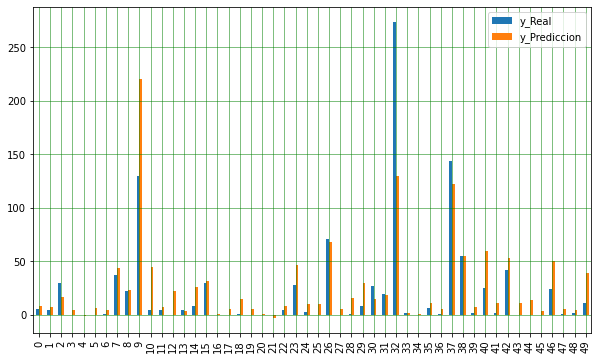

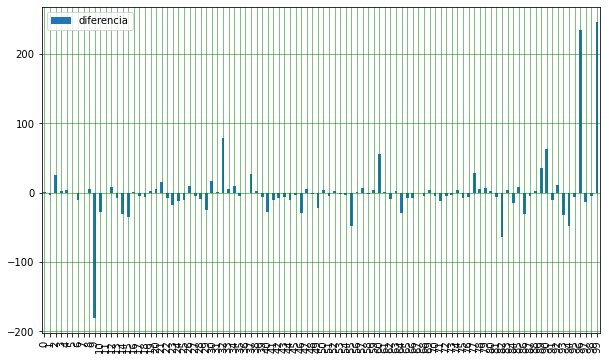

In [32]:
# Modelo con regularización Lasso
modelo8 = make_pipeline(StandardScaler(), Lasso(alpha = 1))
modelo8.fit(x_train, y_train)
y_pred_modelo8 = modelo8.predict(x_test)

mse_test = mean_squared_error(y_pred_modelo8, y_test)
max_err_test = max_error(y_pred_modelo8, y_test)
print("Error cuadrado medio test: %.2f" % mse_test)
print("Maximo error test: %.2f" % max_err_test)

y_pred_train_modelo8 = modelo8.predict(x_train)
mse_train = mean_squared_error(y_train, y_pred_train_modelo8)
max_err_train = max_error(y_train, y_pred_train_modelo8)

print("Error cuadrado medio train: %.2f" % mse_train)
print("Maximo error train: %.2f" % max_err_train)

train_score = modelo8.score(x_train, y_train)
print("Score con training : ", train_score)

test_score = modelo8.score(x_test, y_test)
print("Score con test : ", test_score)

dfs = dfs.append({'Modelo': 'Lasso','ECM Test': mse_test, 'Max error Test':max_err_test, 'score Test': test_score, 'ECM Train': mse_train,'Max error Train': max_err_train, 'score Train': train_score}, ignore_index=True)

data = {'y_Real':    y_test[0:100],
        'y_Prediccion': y_pred_modelo8[0:100]
        }

df = pd.DataFrame(data, columns=['y_Real','y_Prediccion'])

#Presenta los primeros n datos del dataset de test para compararlo con la estimacion
n = 50
df1 = df.head(n)
df1.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

data = {'diferencia' : y_test[0:100] - y_pred_modelo2[0:100]
        }

df = pd.DataFrame(data, columns=['diferencia'])

df1 = df.head(len(y_test))
df1.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()



Error cuadrado medio test: 1866.76
Maximo error test: 246.16
Error cuadrado medio train: 772.66
Maximo error train: 1525.68
Score con training :  0.3431761227806954
Score con test :  0.5128912804904049


C:\Users\Marcelo\AppData\Local\Temp\ipykernel_4920\1493745389.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfs = dfs.append({'Modelo': 'Ridge','ECM Test': mse_test, 'Max error Test':max_err_test, 'score Test': test_score, 'ECM Train': mse_train,'Max error Train': max_err_train, 'score Train': train_score}, ignore_index=True)


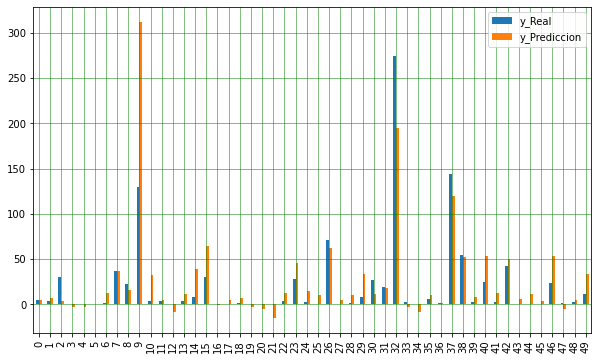

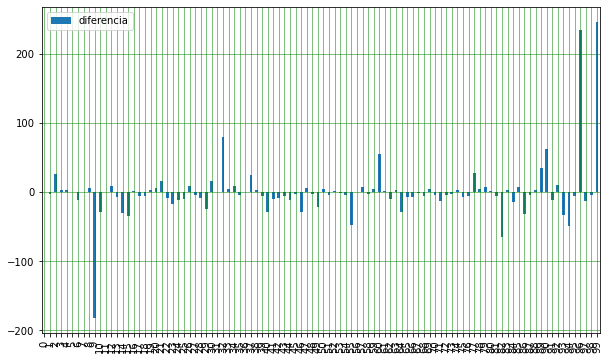

In [33]:
# Modelo con regularización Ridge
modelo9 = make_pipeline(StandardScaler(), Ridge(alpha=1))
modelo9.fit(x_train, y_train)
y_pred_modelo9 = modelo9.predict(x_test)

mse_test = mean_squared_error(y_pred_modelo9, y_test)
max_err_test = max_error(y_pred_modelo9, y_test)
print("Error cuadrado medio test: %.2f" % mse_test)
print("Maximo error test: %.2f" % max_err_test)

y_pred_train_modelo9 = modelo9.predict(x_train)
mse_train = mean_squared_error(y_train, y_pred_train_modelo9)
max_err_train = max_error(y_train, y_pred_train_modelo9)

print("Error cuadrado medio train: %.2f" % mse_train)
print("Maximo error train: %.2f" % max_err_train)

train_score = modelo9.score(x_train, y_train)
print("Score con training : ", train_score)

test_score = modelo9.score(x_test, y_test)
print("Score con test : ", test_score)

dfs = dfs.append({'Modelo': 'Ridge','ECM Test': mse_test, 'Max error Test':max_err_test, 'score Test': test_score, 'ECM Train': mse_train,'Max error Train': max_err_train, 'score Train': train_score}, ignore_index=True)

data = {'y_Real':    y_test[0:100],
        'y_Prediccion': y_pred_modelo9[0:100]
        }

df = pd.DataFrame(data, columns=['y_Real','y_Prediccion'])

#Presenta los primeros n datos del dataset de test para compararlo con la estimacion
n = 50
df1 = df.head(n)
df1.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

data = {'diferencia' : y_test[0:100] - y_pred_modelo9[0:100]
        }

df = pd.DataFrame(data, columns=['diferencia'])

df1 = df.head(len(y_test))
df1.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Error cuadrado medio test: 1777.76
Maximo error test: 242.22
Error cuadrado medio train: 786.38
Maximo error train: 1611.51
Score con training :  0.33151005283983703
Score con test :  0.5361152381601417


C:\Users\Marcelo\AppData\Local\Temp\ipykernel_4920\4578938.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfs = dfs.append({'Modelo': 'Lasso con dataset reducido','ECM Test': mse_test, 'Max error Test':max_err_test, 'score Test': test_score, 'ECM Train': mse_train,'Max error Train': max_err_train, 'score Train': train_score}, ignore_index=True)


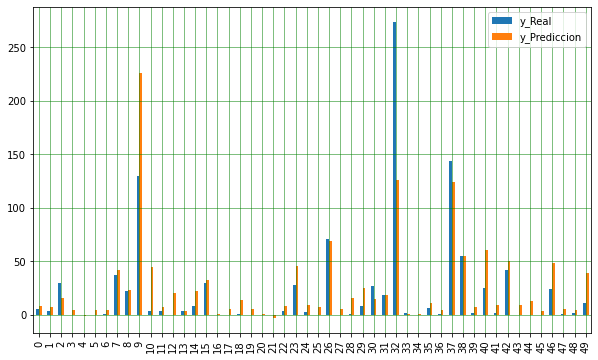

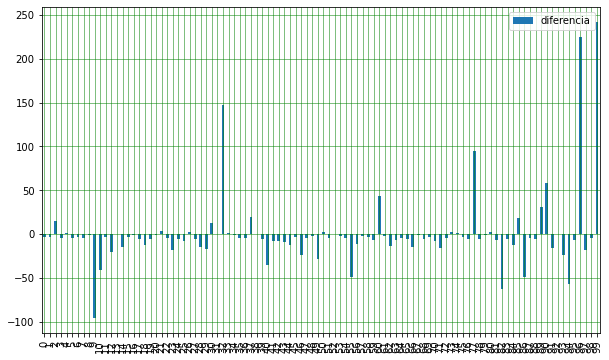

In [34]:
# Modelo Lasso con dataset reducido
modelo10 = make_pipeline(StandardScaler(), Lasso(alpha = 1))
modelo10.fit(x_trainBk1, y_train)
y_pred_modelo10 = modelo10.predict(x_testBk1)

mse_test = mean_squared_error(y_pred_modelo10, y_test)
max_err_test = max_error(y_pred_modelo10, y_test)
print("Error cuadrado medio test: %.2f" % mse_test)
print("Maximo error test: %.2f" % max_err_test)

y_pred_train_modelo10 = modelo10.predict(x_trainBk1)
mse_train = mean_squared_error(y_train, y_pred_train_modelo10)
max_err_train = max_error(y_train, y_pred_train_modelo10)

print("Error cuadrado medio train: %.2f" % mse_train)
print("Maximo error train: %.2f" % max_err_train)

train_score = modelo10.score(x_trainBk1, y_train)
print("Score con training : ", train_score)

test_score = modelo10.score(x_testBk1, y_test)
print("Score con test : ", test_score)

dfs = dfs.append({'Modelo': 'Lasso con dataset reducido','ECM Test': mse_test, 'Max error Test':max_err_test, 'score Test': test_score, 'ECM Train': mse_train,'Max error Train': max_err_train, 'score Train': train_score}, ignore_index=True)

data = {'y_Real':    y_test[0:100],
        'y_Prediccion': y_pred_modelo10[0:100]
        }

df = pd.DataFrame(data, columns=['y_Real','y_Prediccion'])

#Presenta los primeros n datos del dataset de test para compararlo con la estimacion
n = 50
df1 = df.head(n)
df1.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

data = {'diferencia' : y_test[0:100] - y_pred_modelo10[0:100]
        }

df = pd.DataFrame(data, columns=['diferencia'])

df1 = df.head(len(y_test))
df1.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Error cuadrado medio test: 2949.48
Maximo error test: 350.69
Error cuadrado medio train: 778.04
Maximo error train: 1579.82
Score con training :  0.3386011717350297
Score con test :  0.23036838832311057


C:\Users\Marcelo\AppData\Local\Temp\ipykernel_4920\118503820.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfs = dfs.append({'Modelo': 'Ridge con dataset reducido','ECM Test': mse_test, 'Max error Test':max_err_test, 'score Test': test_score, 'ECM Train': mse_train,'Max error Train': max_err_train, 'score Train': train_score}, ignore_index=True)


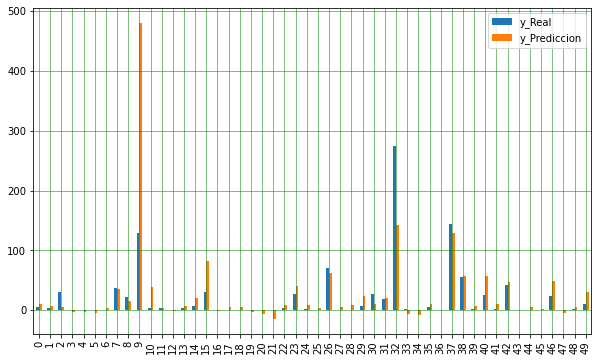

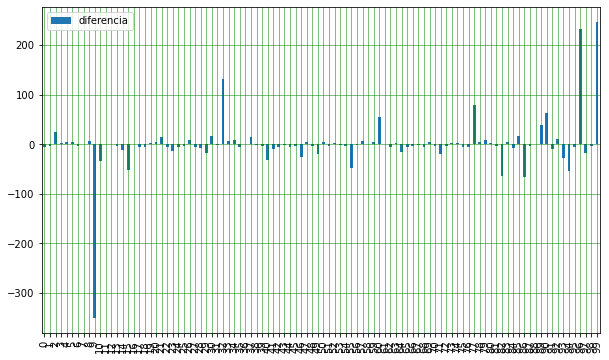

In [35]:
# Modelo con regularización Ridge
modelo11 = make_pipeline(StandardScaler(), Ridge(alpha=1))
modelo11.fit(x_trainBk1, y_train)
y_pred_modelo11 = modelo11.predict(x_testBk1)

mse_test = mean_squared_error(y_pred_modelo11, y_test)
max_err_test = max_error(y_pred_modelo11, y_test)
print("Error cuadrado medio test: %.2f" % mse_test)
print("Maximo error test: %.2f" % max_err_test)

y_pred_train_modelo11 = modelo11.predict(x_trainBk1)
mse_train = mean_squared_error(y_train, y_pred_train_modelo11)
max_err_train = max_error(y_train, y_pred_train_modelo11)

print("Error cuadrado medio train: %.2f" % mse_train)
print("Maximo error train: %.2f" % max_err_train)

train_score = modelo11.score(x_trainBk1, y_train)
print("Score con training : ", train_score)

test_score = modelo11.score(x_testBk1, y_test)
print("Score con test : ", test_score)

dfs = dfs.append({'Modelo': 'Ridge con dataset reducido','ECM Test': mse_test, 'Max error Test':max_err_test, 'score Test': test_score, 'ECM Train': mse_train,'Max error Train': max_err_train, 'score Train': train_score}, ignore_index=True)

data = {'y_Real':    y_test[0:100],
        'y_Prediccion': y_pred_modelo11[0:100]
        }

df = pd.DataFrame(data, columns=['y_Real','y_Prediccion'])

#Presenta los primeros n datos del dataset de test para compararlo con la estimacion
n = 50
df1 = df.head(n)
df1.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

data = {'diferencia' : y_test[0:100] - y_pred_modelo11[0:100]
        }

df = pd.DataFrame(data, columns=['diferencia'])

df1 = df.head(len(y_test))
df1.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [36]:
# Se comparan los resultados de cada modelo

dfsOrdenado = dfs.sort_values('ECM Test', axis = 0, ascending = True)
dfsOrdenado

,Modelo,ECM Test,Max error Test,score Test,ECM Train,Max error Train,score Train
3,Reducido por correlacion de y,1584.793611,240.556,0.514126,790.015381,1535.092069,0.343178
7,Lasso,1748.027446,240.46022,0.543873,785.263032,1611.384528,0.332464
9,Lasso con dataset reducido,1777.759304,242.219553,0.536115,786.384943,1611.507486,0.33151
2,Con escalado sin media,1856.402176,246.208588,0.514126,772.659717,1525.450012,0.343178
0,Basico,1860.394081,246.172222,0.514553,772.659594,1525.452183,0.343178
1,Con escalado,1862.027763,246.166522,0.514126,772.659586,1525.449396,0.343178
8,Ridge,1866.761164,246.162188,0.512891,772.661443,1525.680556,0.343176
6,Sin media reducido con reduccion de features,2885.787465,341.485547,0.246989,778.043143,1579.811902,0.338601
5,Con escalado reducido con reduccion de features,2885.787465,341.485547,0.246989,778.043143,1579.811902,0.338601
4,Basico Reducido con reduccion de features,2885.787465,341.485547,0.246989,778.043143,1579.811902,0.338601


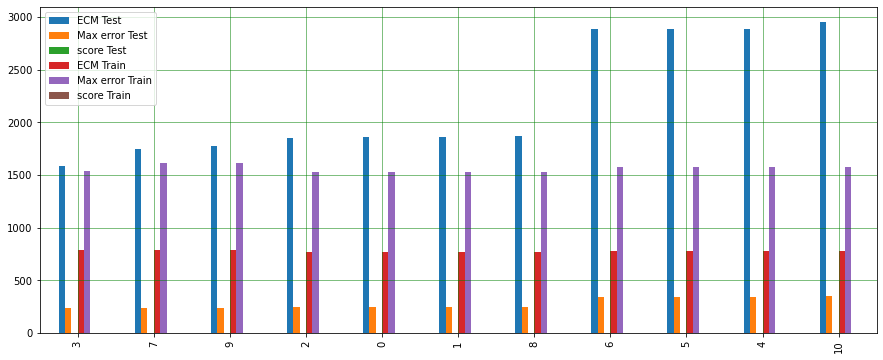

In [37]:
# Compara graficamete los resultados de los modelos

df = pd.DataFrame(dfs,columns=['Modelo', 'ECM Test','Max error Test', 'score Test', 'ECM Train', 'Max error Train', 'score Train'])
df = df.sort_values('ECM Test', axis = 0, ascending = True)
df1 = df.head(15)
df1.plot(kind='bar',figsize=(15,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()


## Conclusion : Los resultados fueron poco satisfactorios, ninguno de los modelos parece aprender correctamente la informacion del dataset como para realizar una prediccion aceptable.